# 1 Hands On: Data Import and Manipulation


## 2. Introduction to R for Machine Learning
 

#### (g) Create an array of 10 random integers between 1 and 100, and then calculate the mean and standard deviation of the array.

In [1]:
# Generate an array of 10 random integers between 1 and 100
random_array <- sample.int(100, 10)

# Calculate the mean of the array
mean_value <- mean(random_array)

# Calculate the standard deviation of the array
sd_value <- sd(random_array)

# Print the array, mean, and standard deviation
print(random_array)
print(mean_value)
print(sd_value)


 [1] 71 63 45 36 29 77 83 70 80 94
[1] 64.8
[1] 21.43621


#### (h) Create a 2-dimensional array of 3 rows and 4 columns with random integer values. Then, calculate the sum of each row and column.

In [2]:
# Create a 2-dimensional array with random integers
array_2d <- matrix(sample(1:100, 12, replace = TRUE), nrow = 3, ncol = 4)

# Calculate the sum of each row
row_sums <- rowSums(array_2d)

# Calculate the sum of each column
col_sums <- colSums(array_2d)

# Print the 2-dimensional array
print(array_2d)

# Print the sum of each row
print(row_sums)

# Print the sum of each column
print(col_sums)


     [,1] [,2] [,3] [,4]
[1,]   47   71   21   14
[2,]    2   72   44   65
[3,]   42   23   13   75
[1] 153 183 153
[1]  91 166  78 154


#### (i) Create a DataFrame with 3 columns: "Name", "Age", and "City". Add at least 5 rows of data to the DataFrame. Then, filter the DataFrame to only include rows where the person's age is greater than or equal to 30.

In [7]:
# Create the DataFrame
df <- data.frame(
  Name = c("Paola", "Alejandro", "Daniela", "Cristian", "Ivan"),
  Age = c(23, 8, 31, 38, 47),
  City = c("Quito", "Ambato", "Cuenca", "Guayaquil", "Manta"))

# Filter the DataFrame based on age >= 30
filtered_df <- subset(df, Age >= 30)

# Print the original DataFrame
print(df)

# Print the filtered DataFrame
print(filtered_df)


       Name Age      City
1     Paola  23     Quito
2 Alejandro   8    Ambato
3   Daniela  31    Cuenca
4  Cristian  38 Guayaquil
5      Ivan  47     Manta
      Name Age      City
3  Daniela  31    Cuenca
4 Cristian  38 Guayaquil
5     Ivan  47     Manta


#### (j) Load a CSV file into a DataFrame and then calculate the mean, median, and mode of one of the columns in the DataFrame.

In [6]:
# Load the CSV file into a DataFrame
df <- read.csv("/kaggle/input/servicearea/ServiceArea.csv")  

# Calculate the mean of VersionNum
mean_value <- mean(df$VersionNum)

# Calculate the median of VersionNum
median_value <- median(df$VersionNum)

# Calculate the mode of VersionNum
mode_value <- names(table(df$VersionNum))[which.max(table(df$VersionNum))]

# Print the mean, median, and mode of VersionNum
print(mean_value)
print(median_value)
print(mode_value)


[1] 7.062087
[1] 6
[1] "6"


#### (k) Create a scatter plot of random x and y values between 1 and 100.

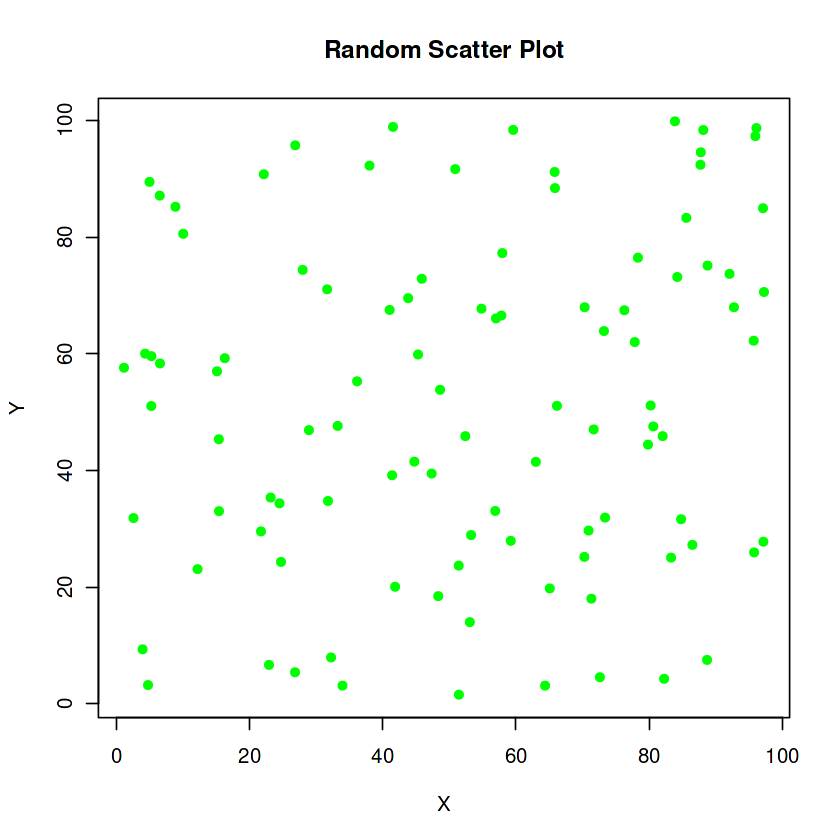

In [8]:
# Generate random x and y values
x <- runif(100, min = 1, max = 100)
y <- runif(100, min = 1, max = 100)

# Create a scatter plot
plot(x, y, main = "Random Scatter Plot", xlab = "X", ylab = "Y", pch = 16, col = "green")

#### (l) Load a CSV file into a DataFrame and then create a line chart of one of the columns in the DataFrame.


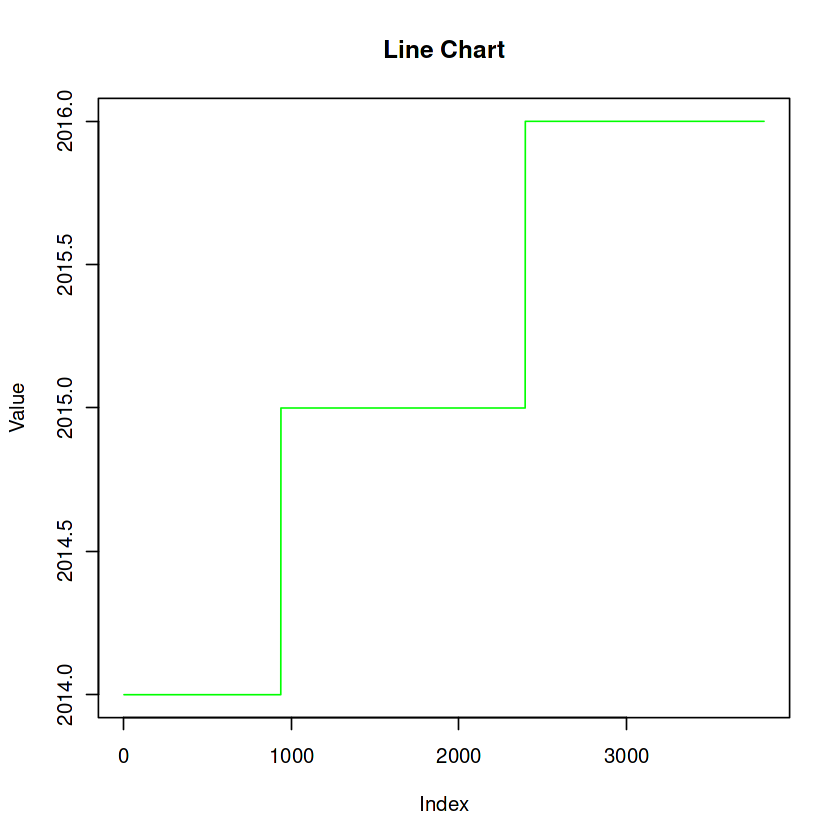

In [10]:
# Load the CSV file into a DataFrame
df <- read.csv("/kaggle/input/network/Network.csv")  

# Create a line chart of BusinessYear
plot(df$BusinessYear, type = "l", xlab = "Index", ylab = "Value", main = "Line Chart", col = "green")


## 3. Data Import


The Echocardiogram data set in the UCI Machine Learning repository contains information on a set of
patients that suffered heart attacks at some point in the past.

#### (a) Download the Echocardiogram data set and import it to a data frame. Read the information on the data set and find out how missing values are represented and make sure that they are properly represented.

In [32]:
df <- read.csv("/kaggle/input/hands-on-2023a/data/01_datamanip/echocardiogram.data", header = FALSE)

# Check for missing values in the DataFrame
missing_values <- is.na(df)

# Count the number of missing values in each column
col_missing_counts <- colSums(missing_values)

# Display the number of missing values in each column
print(col_missing_counts)




 V1  V2  V3  V4  V5  V6  V7  V8  V9 V10 V11 V12 V13 
  0   0   0   0   0   0   0   0   0   0   0   0   0 


In [33]:
# Replace "?" with NA in the DataFrame
df[df == "?"] <- NA

# Check for missing values
missing_values <- is.na(df)
col_missing_counts <- colSums(missing_values)
print(col_missing_counts)


 V1  V2  V3  V4  V5  V6  V7  V8  V9 V10 V11 V12 V13 
  2   1   5   1   8  15  11   4   1   4   0  22  58 


#### (b) Assign the attributes with meaningful names. You can look for this information on the same webpage.

In the webpage and in echocardiogram.names describes: 

1. survival -- the number of months patient survived (has survived, if patient is still alive). Because all the patients had their heart attacks at different times, it is possible that some patients have survived less than one year but they are still alive. Check the second variable to confirm this. Such patients cannot be used for the prediction task mentioned above.
2. still-alive -- a binary variable. 0=dead at end of survival period, 1 means still alive
3. age-at-heart-attack -- age in years when heart attack occurred
4. pericardial-effusion -- binary. Pericardial effusion is fluid around the heart. 0=no fluid, 1=fluid
5. fractional-shortening -- a measure of contracility around the heart lower numbers are increasingly abnormal
6. epss -- E-point septal separation, another measure of contractility. Larger numbers are increasingly abnormal.
7. lvdd -- left ventricular end-diastolic dimension. This is a measure of the size of the heart at end-diastole. Large hearts tend to be sick hearts.
8. wall-motion-score -- a measure of how the segments of the left ventricle are moving
9. wall-motion-index -- equals wall-motion-score divided by number of segments seen. Usually 12-13 segments are seen in an echocardiogram. Use this variable INSTEAD of the wall motion score.
10. mult -- a derivate var which can be ignored
11. name -- the name of the patient (I have replaced them with "name")
12. group -- meaningless, ignore it
13. alive-at-1 -- Boolean-valued. Derived from the first two attributes. 0 means patient was either dead after 1 year or had been followed for less than 1 year. 1 means patient was alive at 1 year.



In [34]:
# Assign meaningful attribute names to the columns
names(df) <- c('survival', 'still-alive', 'age-at-heart-attack', 'pericardial-effusion', 'fractional-shortening ',
              'epss', 'lvdd', 'wall-motion-score', 'wall-motion-index','mult','name','group', 'alive-at-1')

# Print the header of the DataFrame
header <- names(df)
print(header)


 [1] "survival"               "still-alive"            "age-at-heart-attack"   
 [4] "pericardial-effusion"   "fractional-shortening " "epss"                  
 [7] "lvdd"                   "wall-motion-score"      "wall-motion-index"     
[10] "mult"                   "name"                   "group"                 
[13] "alive-at-1"            


#### (c) According to that same information, is there any redundant or irrelevant attribute that you can remove? Remove them.

Attributes to remove:
- 'mult': is mentioned as a derivative variable that can be ignored in echocardiogram.names.
- 'name': this columns contains the same info.
- 'group': The 'group' attribute is described as meaningless in echocardiogram.names.
- 'alive-at-1': The 'alive-at-1' attribute is derived from the first two attributes and indicates whether the patient was alive at 1 year, it might be redundant.

In [39]:
#Delete specific columns from the DataFrame
df <- subset(df, select = -c(mult, name, group))
# Print the header updated DataFrame
header <- names(df)
print(header)



 [1] "survival"               "still-alive"            "age-at-heart-attack"   
 [4] "pericardial-effusion"   "fractional-shortening " "epss"                  
 [7] "lvdd"                   "wall-motion-score"      "wall-motion-index"     
[10] "alive-at-1"            


#### (d) Is there any data type change that you find useful? Perform it.


In [42]:
# Check for missing values
missing_values <- is.na(df)
col_missing_counts <- colSums(missing_values)
print(col_missing_counts)

              survival            still-alive    age-at-heart-attack 
                     2                      1                      5 
  pericardial-effusion fractional-shortening                    epss 
                     1                      8                     15 
                  lvdd      wall-motion-score      wall-motion-index 
                    11                      4                      1 
            alive-at-1 
                    58 


## 4. Data Manipulation


Load the airquality data set regarding a set of New York Air Quality Measurements.


In [82]:
df <- read.csv("/kaggle/input/airquality/airquality.csv")
df


Ozone,Solar.R,Wind,Temp,Month,Day
<int>,<int>,<dbl>,<int>,<int>,<int>
41,190,7.4,67,5,1
36,118,8.0,72,5,2
12,149,12.6,74,5,3
18,313,11.5,62,5,4
NA,NA,14.3,56,5,5
28,NA,14.9,66,5,6
23,299,8.6,65,5,7
19,99,13.8,59,5,8
8,19,20.1,61,5,9


#### (n) For which attributes are there missing values?

In [83]:
# Check for missing values in each attribute
missing_counts <- colSums(is.na(df))

# Get the names of attributes with missing values
attributes_with_missing <- names(missing_counts[missing_counts > 0])

# Print the attributes with missing values
print(attributes_with_missing)


[1] "Ozone"   "Solar.R"


#### (o) Do all the attributes are in the most suitable data type? Make the changes you find necessary.


In [84]:
# Check the structure of the DataFrame
str(df)


'data.frame':	153 obs. of  6 variables:
 $ Ozone  : int  41 36 12 18 NA 28 23 19 8 NA ...
 $ Solar.R: int  190 118 149 313 NA NA 299 99 19 194 ...
 $ Wind   : num  7.4 8 12.6 11.5 14.3 14.9 8.6 13.8 20.1 8.6 ...
 $ Temp   : int  67 72 74 62 56 66 65 59 61 69 ...
 $ Month  : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Day    : int  1 2 3 4 5 6 7 8 9 10 ...


In [87]:
# Convert 'Temp' attribute to float64
df$Temp <- as.numeric(df$Temp)

# Check the updated data type of 'Temp'
str(df$Temp)


 num [1:153] 67 72 74 62 56 66 65 59 61 69 ...


In [88]:
# Combine 'Month' and 'Day' columns into a single column representing the date
df$Date <- paste(df$Month, df$Day, sep = "-")


# Check the updated data type of 'Date'
str(df$Date)


 chr [1:153] "5-1" "5-2" "5-3" "5-4" "5-5" "5-6" "5-7" "5-8" "5-9" "5-10" ...


In [89]:
# Check the structure of the DataFrame
str(df)


'data.frame':	153 obs. of  7 variables:
 $ Ozone  : int  41 36 12 18 NA 28 23 19 8 NA ...
 $ Solar.R: int  190 118 149 313 NA NA 299 99 19 194 ...
 $ Wind   : num  7.4 8 12.6 11.5 14.3 14.9 8.6 13.8 20.1 8.6 ...
 $ Temp   : num  67 72 74 62 56 66 65 59 61 69 ...
 $ Month  : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Day    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Date   : chr  "5-1" "5-2" "5-3" "5-4" ...


#### (p) What period of the year do these records refer to?

In [90]:
# Extract unique values of the 'Month' attribute
unique_months <- unique(df$Month)

# Map month numbers to corresponding period of the year
month_periods <- c(
  'January',
  'February',
  'March',
  'April',
  'May',
  'June',
  'July',
  'August',
  'September',
  'October',
  'November',
  'December'
)

# Period of the year
period_of_year <- month_periods[unique_months]

# Print the period of the year
print(period_of_year)



[1] "May"       "June"      "July"      "August"    "September"


#### (q) Load the package dplyr and save the data set in a table data frame format.


In [91]:
# Load the dplyr package
library(dplyr)

# Save the dataset as a table data frame
df <- as.data.frame(df)

# Confirm the dataset is in table data frame format
str(df)


'data.frame':	153 obs. of  7 variables:
 $ Ozone  : int  41 36 12 18 NA 28 23 19 8 NA ...
 $ Solar.R: int  190 118 149 313 NA NA 299 99 19 194 ...
 $ Wind   : num  7.4 8 12.6 11.5 14.3 14.9 8.6 13.8 20.1 8.6 ...
 $ Temp   : num  67 72 74 62 56 66 65 59 61 69 ...
 $ Month  : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Day    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Date   : chr  "5-1" "5-2" "5-3" "5-4" ...


#### (r) Select the days in May with a temperature above 70 Fahrenheit.


In [92]:
# Convert Month column to Date type
df$Month <- as.Date(paste(df$Month, df$Day, sep="-"), format="%m-%d")

# Filter the data for May with temperature above 70 Fahrenheit
filtered_data <- df %>%
  filter(format(Month, "%m") == "05" & Temp > 70)

# View the filtered data
print(filtered_data)

  Ozone Solar.R Wind Temp      Month Day Date
1    36     118  8.0   72 2023-05-02   2  5-2
2    12     149 12.6   74 2023-05-03   3  5-3
3     7      NA  6.9   74 2023-05-11  11 5-11
4    11     320 16.6   73 2023-05-22  22 5-22
5    45     252 14.9   81 2023-05-29  29 5-29
6   115     223  5.7   79 2023-05-30  30 5-30
7    37     279  7.4   76 2023-05-31  31 5-31


#### (s) Create a new attribute TempC which represents the temperature values in Celsius

In [93]:
# Create new attribute TempC with temperature values in Celsius
df <- df %>%
  mutate(TempC = (Temp - 32) * 5/9)

# View the updated data frame with TempC attribute
print(df)

    Ozone Solar.R Wind Temp      Month Day Date    TempC
1      41     190  7.4   67 2023-05-01   1  5-1 19.44444
2      36     118  8.0   72 2023-05-02   2  5-2 22.22222
3      12     149 12.6   74 2023-05-03   3  5-3 23.33333
4      18     313 11.5   62 2023-05-04   4  5-4 16.66667
5      NA      NA 14.3   56 2023-05-05   5  5-5 13.33333
6      28      NA 14.9   66 2023-05-06   6  5-6 18.88889
7      23     299  8.6   65 2023-05-07   7  5-7 18.33333
8      19      99 13.8   59 2023-05-08   8  5-8 15.00000
9       8      19 20.1   61 2023-05-09   9  5-9 16.11111
10     NA     194  8.6   69 2023-05-10  10 5-10 20.55556
11      7      NA  6.9   74 2023-05-11  11 5-11 23.33333
12     16     256  9.7   69 2023-05-12  12 5-12 20.55556
13     11     290  9.2   66 2023-05-13  13 5-13 18.88889
14     14     274 10.9   68 2023-05-14  14 5-14 20.00000
15     18      65 13.2   58 2023-05-15  15 5-15 14.44444
16     14     334 11.5   64 2023-05-16  16 5-16 17.77778
17     34     307 12.0   66 202

#### (t) Inspect which were the 30 hottest days.


In [94]:
# Sort the data frame by temperature in descending order
sorted_data <- df %>% 
  arrange(desc(Temp)) 

# Select the top 30 rows (30 hottest days)
hottest_days <- head(sorted_data, 30)

# View the 30 hottest days
print(hottest_days)

   Ozone Solar.R Wind Temp      Month Day Date    TempC
1     76     203  9.7   97 2023-08-28  28 8-28 36.11111
2     84     237  6.3   96 2023-08-30  30 8-30 35.55556
3    118     225  2.3   94 2023-08-29  29 8-29 34.44444
4     85     188  6.3   94 2023-08-31  31 8-31 34.44444
5     NA     259 10.9   93 2023-06-11  11 6-11 33.88889
6     73     183  2.8   93 2023-09-03   3  9-3 33.88889
7     91     189  4.6   93 2023-09-04   4  9-4 33.88889
8     NA     250  9.2   92 2023-06-12  12 6-12 33.33333
9     97     267  6.3   92 2023-07-08   8  7-8 33.33333
10    97     272  5.7   92 2023-07-09   9  7-9 33.33333
11    NA     222  8.6   92 2023-08-10  10 8-10 33.33333
12    78     197  5.1   92 2023-09-02   2  9-2 33.33333
13    NA     291 14.9   91 2023-07-14  14 7-14 32.77778
14    96     167  6.9   91 2023-09-01   1  9-1 32.77778
15    71     291 13.8   90 2023-06-09   9  6-9 32.22222
16    89     229 10.3   90 2023-08-08   8  8-8 32.22222
17   110     207  8.0   90 2023-08-09   9  8-9 3

#### (u) Inspect which were the hottest days, but also with the highest ozone values.


In [95]:
# Filter the data for the hottest days
hottest_days <- df %>%
  filter(Temp == max(Temp))

# Filter the hottest days for the highest ozone values
hottest_days_with_high_ozone <- hottest_days %>%
  filter(Ozone == max(Ozone))

# View the days with the highest temperatures and highest ozone values
print(hottest_days_with_high_ozone)

  Ozone Solar.R Wind Temp      Month Day Date    TempC
1    76     203  9.7   97 2023-08-28  28 8-28 36.11111


#### (v) Inspect the number of days for which there was a register for each month.


In [96]:
# Count the number of days for each month
count_per_month <- df %>%
  group_by(Month) %>%
  summarize(Count = n())

# View the number of days for each month
print(count_per_month)


# A tibble: 153 × 2
   Month      Count
   <date>     <int>
 1 2023-05-01     1
 2 2023-05-02     1
 3 2023-05-03     1
 4 2023-05-04     1
 5 2023-05-05     1
 6 2023-05-06     1
 7 2023-05-07     1
 8 2023-05-08     1
 9 2023-05-09     1
10 2023-05-10     1
# ℹ 143 more rows


#### (w) For each month, obtain the minimum and the maximum temperature registered in Celsius.


In [97]:
# Calculate the minimum and maximum temperature for each month
min_max_temps <- df %>%
  group_by(Month) %>%
  summarize(Min_Temp = min(TempC), Max_Temp = max(TempC))

# View the minimum and maximum temperature for each month
print(min_max_temps)

# A tibble: 153 × 3
   Month      Min_Temp Max_Temp
   <date>        <dbl>    <dbl>
 1 2023-05-01     19.4     19.4
 2 2023-05-02     22.2     22.2
 3 2023-05-03     23.3     23.3
 4 2023-05-04     16.7     16.7
 5 2023-05-05     13.3     13.3
 6 2023-05-06     18.9     18.9
 7 2023-05-07     18.3     18.3
 8 2023-05-08     15       15  
 9 2023-05-09     16.1     16.1
10 2023-05-10     20.6     20.6
# ℹ 143 more rows


#### (x) Obtain the average of the following parameters by month: temperature in celsius, wind, solar radiation and ozone.


In [98]:
# Calculate the average of parameters by month
average_params <- df %>%
  group_by(Month) %>%
  summarize(Avg_Temp = mean(TempC),
            Avg_Wind = mean(Wind),
            Avg_Solar = mean(`Solar.R`),
            Avg_Ozone = mean(Ozone))

# View the average parameters by month
print(average_params)

# A tibble: 153 × 5
   Month      Avg_Temp Avg_Wind Avg_Solar Avg_Ozone
   <date>        <dbl>    <dbl>     <dbl>     <dbl>
 1 2023-05-01     19.4      7.4       190        41
 2 2023-05-02     22.2      8         118        36
 3 2023-05-03     23.3     12.6       149        12
 4 2023-05-04     16.7     11.5       313        18
 5 2023-05-05     13.3     14.3        NA        NA
 6 2023-05-06     18.9     14.9        NA        28
 7 2023-05-07     18.3      8.6       299        23
 8 2023-05-08     15       13.8        99        19
 9 2023-05-09     16.1     20.1        19         8
10 2023-05-10     20.6      8.6       194        NA
# ℹ 143 more rows


#### (y) What values did you obtain regarding ozone and solar radiation attributes? Why? Make thenecessary change so that you get the average of the registered values.

In [101]:
# Calculate the average of parameters by month
average_params <- df %>%
  group_by(Month) %>%
  summarize(Avg_Temp = mean(TempC),
            Avg_Wind = mean(Wind),
            Avg_Solar = mean(`Solar.R`, na.rm = TRUE),
            Avg_Ozone = mean(Ozone, na.rm = TRUE))

# View the average parameters by month
print(average_params)


# A tibble: 153 × 5
   Month      Avg_Temp Avg_Wind Avg_Solar Avg_Ozone
   <date>        <dbl>    <dbl>     <dbl>     <dbl>
 1 2023-05-01     19.4      7.4       190        41
 2 2023-05-02     22.2      8         118        36
 3 2023-05-03     23.3     12.6       149        12
 4 2023-05-04     16.7     11.5       313        18
 5 2023-05-05     13.3     14.3       NaN       NaN
 6 2023-05-06     18.9     14.9       NaN        28
 7 2023-05-07     18.3      8.6       299        23
 8 2023-05-08     15       13.8        99        19
 9 2023-05-09     16.1     20.1        19         8
10 2023-05-10     20.6      8.6       194       NaN
# ℹ 143 more rows
